## Netflix Data Analysis

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import plotly.express as px


In [9]:

df=pd.read_csv(r'E:\GitHub_Repositories\Netflix-Data-Analysis\netflix_titles.csv')

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [11]:
df.shape

(6234, 12)

In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

###### We see that columns "directors, cast, country, date_added, rating" consists of multiple values. Specifically, the first three of the mentioned columns contains a huge number of NULL values and these columns are categorical so we will just populate a relevant information in the NULL rows of these columns.

In [14]:
df['director']=df['director'].fillna(value='No Director')
df['cast']=df['cast'].fillna(value='No Cast')
df['country']=df['country'].fillna(value='No Country')

In [15]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      11
release_year     0
rating          10
duration         0
listed_in        0
description      0
dtype: int64

###### All the NULL values from columns "directors, cast, country" are handled. As columns "date_added and rating" contains a small number of NULL values, it seems fair to drop these few rows and work on analysis of the rest of the data.

In [16]:
df=df.dropna()

In [17]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

###### All NULL values have been handled now.

## Now let's check if there is scope of cleaning any columns here.

In [18]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##### Let's work on the date columns.

In [19]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month


In [20]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,2016,9
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",8,2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,8,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand",2019-04-10,2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...,10,2019,4
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,2019-04-01,2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...,1,2019,4
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,2016-04-01,2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien...",1,2016,4
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,2016-04-01,2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...,1,2016,4


##### Let's start off with some visualizations now

Text(0.5, 1.0, 'Type')

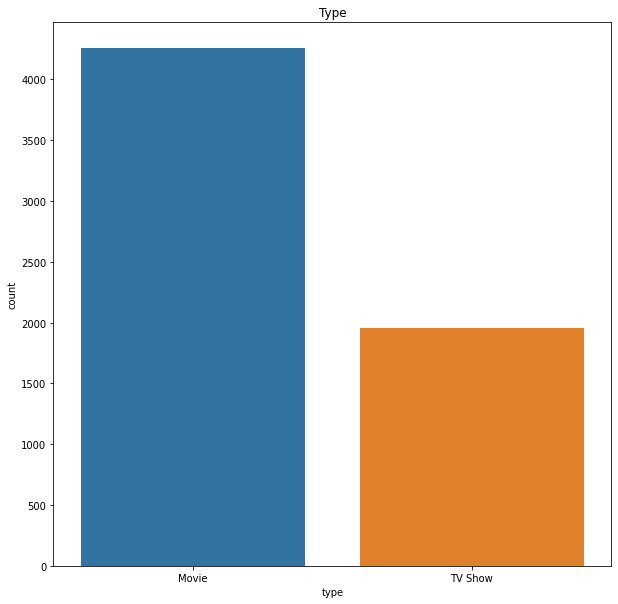

In [102]:
sns.countplot(x=df['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

In [103]:
grp = df.groupby(['rating']).size().reset_index(name='counts')

pieChart = px.pie(grp, values='counts', names='rating',  title='Content Rating Distribution',
                  color_discrete_sequence=px.colors.qualitative.Set2)
pieChart.show()

Text(0.5, 1.0, 'Rating')

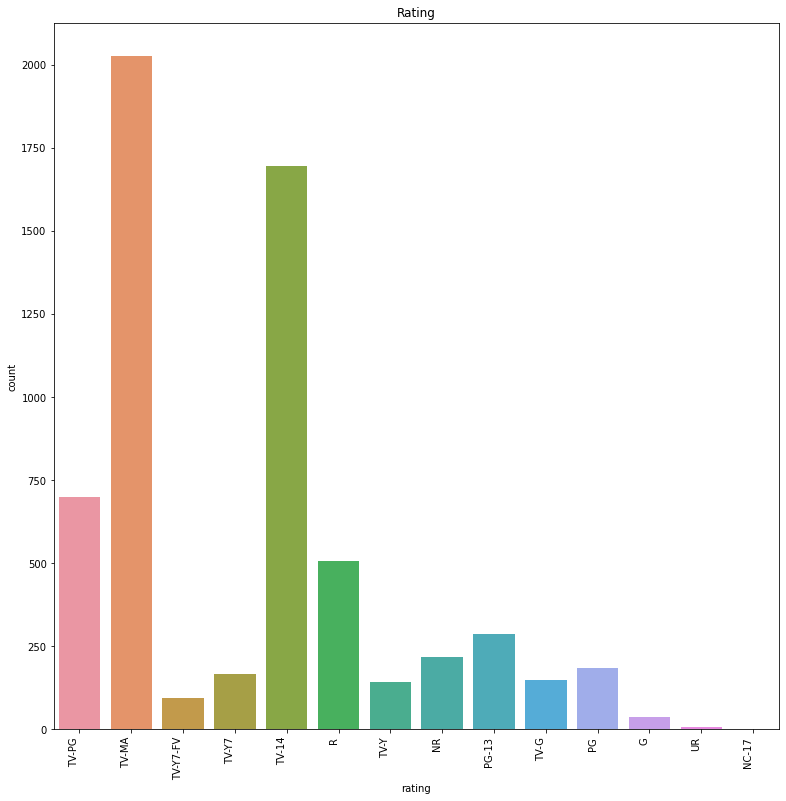

In [85]:
sns.countplot(x=df['rating'])
sns.countplot(x=df['rating']).set_xticklabels(sns.countplot(x=df['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

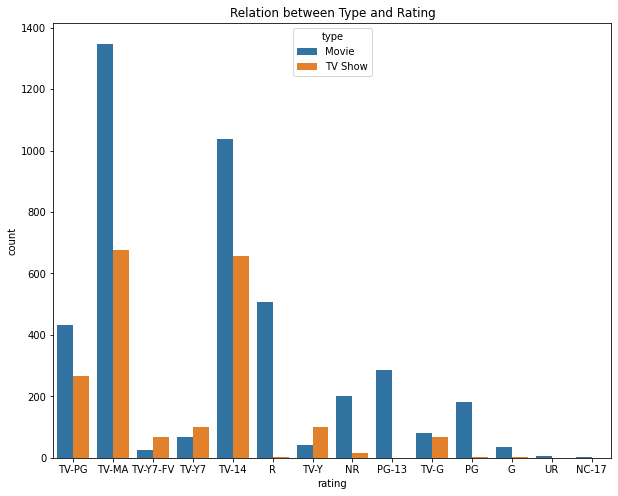

In [43]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

In [89]:
dirs=pd.DataFrame()
dirs=df['director'].str.split(',',expand=True).stack()
dirs=dirs.to_frame()
dirs.columns=['Director']

dirs1=dirs.groupby(['Director']).size().reset_index(name='Total Content')
dirs1=dirs1[dirs1.Director !='No Director']
dirs1=directors.sort_values(by=['Total Content'],ascending=False)

TopFiveDirs=dirs1.head()
TopFiveDirs=TopFiveDirs.sort_values(by=['Total Content'])

fig1=px.bar(TopFiveDirs,x='Total Content',y='Director',title='Top Five Directors')
fig1.show()

In [94]:
cast=pd.DataFrame()
cast=df['cast'].str.split(',',expand=True).stack()
cast=cast.to_frame()
cast.columns=['Actor']

actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast']
actors=actors.sort_values(by=['Total Content'],ascending=False)

TopFiveActors=actors.head()
TopFiveActors=TopFiveActors.sort_values(by=['Total Content'])

fig2=px.bar(actorsTopFive,x='Total Content',y='Actor', title='Top Five Actors')
fig2.show()

In [96]:

df1=df[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2000]

fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Content Trend')
fig3.show()

In [101]:
dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})

for index,row in dfx.iterrows():
    desc=row['description']
    testimonial=TextBlob(desc)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Netflix Content Sentiment Analysis")
fig4.show()